In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Segment Code Plots
In order to fix the gold long path files with need to first shift the segment codes and then relabel the waypoints. Below we include plots of segment code versus time for each of the seven pilots.

*these paths contain obvious resets

## Pilot P3061*

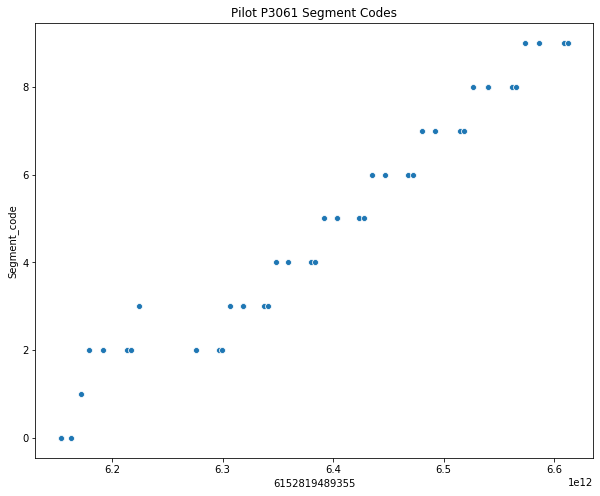

In [33]:
p3061 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\GoldFlightSimData\AFRLAgent_6152807954238_P3061.txt',sep='	',skiprows=2)
p3061_waypoints = p3061[['6152819489355','Segment_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P3061 Segment Codes')
sns.scatterplot(x='6152819489355',y='Segment_code',data=p3061_waypoints)

## Pilot P5454

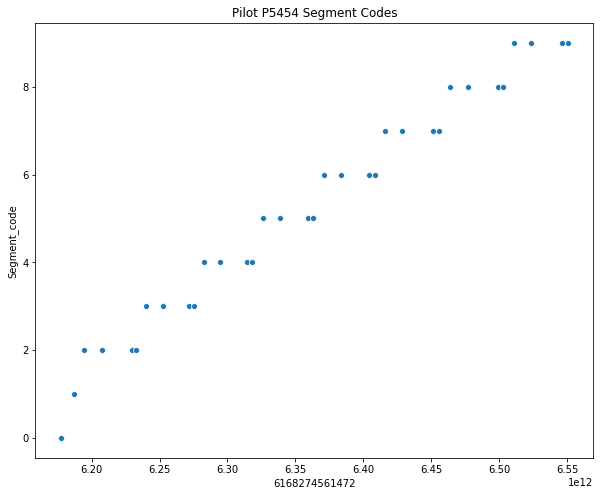

In [30]:
p5454 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\GoldFlightSimData\AFRLAgent_6168263773276_P5454.txt',sep='	',skiprows=2)
p5454_waypoints = p5454[['6168274561472','Segment_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P5454 Segment Codes')
sns.scatterplot(x='6168274561472',y='Segment_code',data=p5454_waypoints)

## Pilot P3130

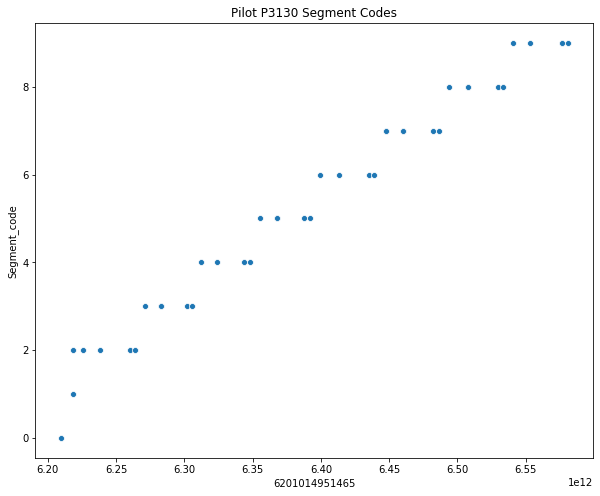

In [34]:
p3130 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\GoldFlightSimData\AFRLAgent_6201001215825_P3130.txt',sep='	',skiprows=2)
p3130_waypoints = p3130[['6201014951465','Segment_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P3130 Segment Codes')
sns.scatterplot(x='6201014951465',y='Segment_code',data=p3130_waypoints)

## Pilot P7234

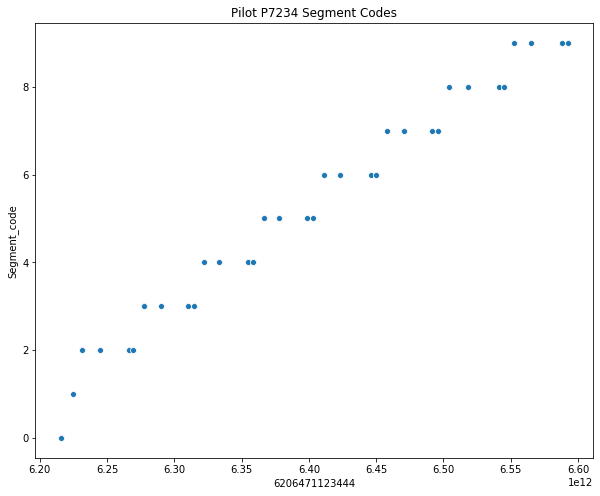

In [35]:
p7234 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\GoldFlightSimData\AFRLAgent_6206460016536_P7234.txt',sep='	',skiprows=2)
p7234_waypoints = p7234[['6206471123444','Segment_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P7234 Segment Codes')
sns.scatterplot(x='6206471123444',y='Segment_code',data=p7234_waypoints)

## Pilot P7438

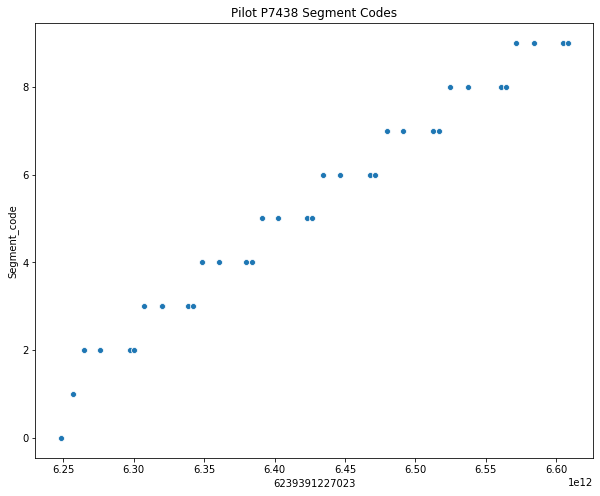

In [36]:
p7438 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\GoldFlightSimData\AFRLAgent_6239379978497_P7438.txt',sep='	',skiprows=2)
p7438_waypoints = p7438[['6239391227023','Segment_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P7438 Segment Codes')
sns.scatterplot(x='6239391227023',y='Segment_code',data=p7438_waypoints)

## Pilot P5521

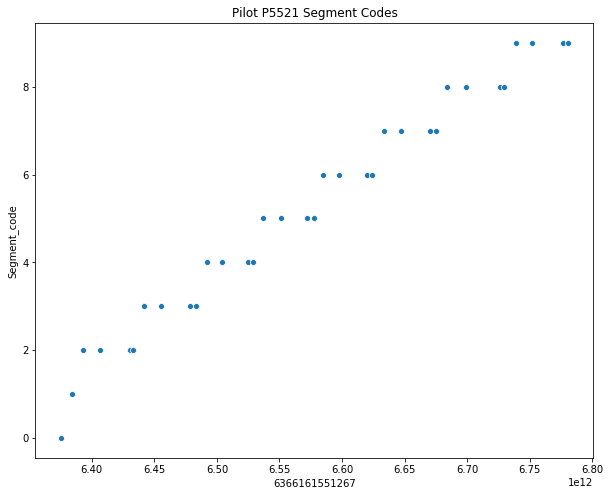

In [37]:
p5521 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\GoldFlightSimData\AFRLAgent_6366148086779_P5521.txt',sep='	',skiprows=2)
p5521_waypoints = p5521[['6366161551267','Segment_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P5521 Segment Codes')
sns.scatterplot(x='6366161551267',y='Segment_code',data=p5521_waypoints)

## Pilot P8641*

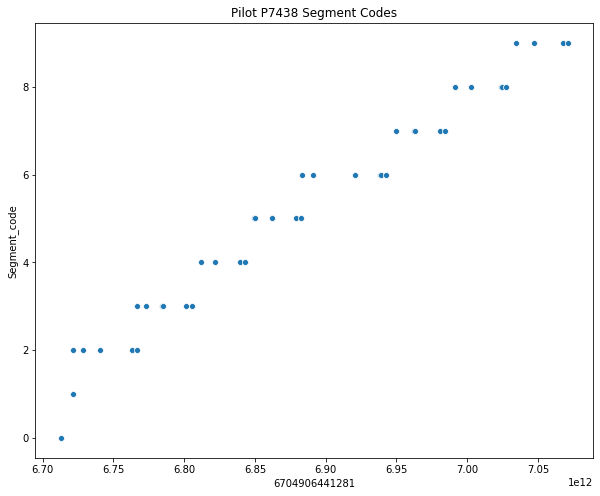

In [38]:
p8641 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\GoldFlightSimData\AFRLAgent_6704895162782_P8641.txt',sep='	',skiprows=2)
p8641_waypoints = p8641[['6704906441281','Segment_code']].dropna()
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Pilot P7438 Segment Codes')
sns.scatterplot(x='6704906441281',y='Segment_code',data=p8641_waypoints)

# Segment Shifting
We first shift the segment codes of the non-asterisk gold paths (we will have to fix the * paths manually) and save each one as a new .txt file.

In [27]:
def code_shift(code):
    if (code['Segment_code'] >= 0) and (code['FinalSegment_code'] == 1):
        return code+1
    else:
        return code

In [28]:
pilot_ids = ['6168263773276_P5454','6201001215825_P3130','6206460016536_P7234','6239379978497_P7438','6366148086779_P5521']

for pilot_id in pilot_ids:
    path = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\GoldFlightSimData\AFRLAgent_'+pilot_id+'.txt',sep='	',skiprows=2)
    path_waypoints = path[['Segment_code']].dropna()
    path_waypoints['FinalSegment_code'] = (path_waypoints['Segment_code'] - path_waypoints['Segment_code'].shift(1)).shift(-1).fillna(1)
    path_waypoints['Segment_code'] = path_waypoints.apply(code_shift,axis=1)['Segment_code']
    indices = path.loc[~path['Segment_code'].isnull()].index
    new_codes = pd.Series(path_waypoints['Segment_code'],index=indices)
    path.loc[~path['Segment_code'].isnull(),['Segment_code']] = new_codes
    index_zero = path[path['IsPaused']==0].index[0]
    path.iloc[index_zero, 55] = 0
    path.to_csv('Shifted_AFRLAgent_'+pilot_id+'.txt',na_rep=np.NaN,index=False,sep='	')

# Waypoint Relabeling
Currently, the gold waypoints are labeled sequentially (0-34).

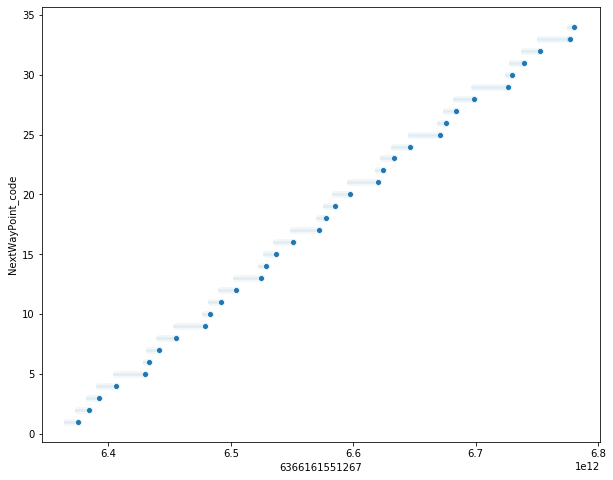

In [47]:
p5521 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\Gold Path Blake\Shifted Gold Long Paths\Shifted_AFRLAgent_6366148086779_P5521.txt',sep='	')
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='6366161551267',y='NextWayPoint_code',data=p5521)

This section explains how to relabel the gold waypoints so that the values of "PreviousWayPoint_code", "NextWayPoint_code" and "TargetWayPoint_code" in each segment correspond to those values in the blue flight path, in which the waypoints are labeled sequentially (0-34).

We define an algorithmic relabeling function that applies a linear transformation onto all points that lie between certain "PreviousWayPoint_code" and "TargetWayPoint_code" values.

In [95]:
def code_relabel(code):
    if (code['PreviousWayPoint_code'] >= 1) and (code['NextWayPoint_code'] <= 5):
            return code+28
    elif (code['PreviousWayPoint_code'] >= 5) and (code['NextWayPoint_code'] <= 9):
            return code+20
    elif (code['PreviousWayPoint_code'] >= 9) and (code['NextWayPoint_code'] <= 13):
            return code+12
    elif (code['PreviousWayPoint_code'] >= 13) and (code['NextWayPoint_code'] <= 17):
            return code+4
    elif (code['PreviousWayPoint_code'] >= 17) and (code['NextWayPoint_code'] <= 21):
            return code-4
    elif (code['PreviousWayPoint_code'] >= 21) and (code['NextWayPoint_code'] <= 25):
            return code-12
    elif (code['PreviousWayPoint_code'] >= 25) and (code['NextWayPoint_code'] <= 29):
            return code-20
    elif (code['PreviousWayPoint_code'] >= 29) and (code['NextWayPoint_code'] <= 33):
            return code-28
    else:
        return code

We can apply this function to the P5521 flight path as follows:

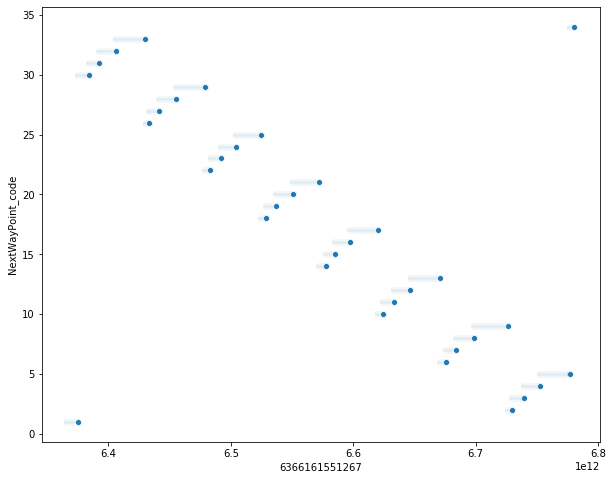

In [94]:
p5521 = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\Gold Path Blake\Shifted Gold Long Paths\Shifted_AFRLAgent_6366148086779_P5521.txt',sep='	')
p5521[['PreviousWayPoint_code','NextWayPoint_code','TargetWayPoint_code']] = p5521[['PreviousWayPoint_code','NextWayPoint_code','TargetWayPoint_code']].apply(code_relabel,axis=1)

fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='6366161551267',y='NextWayPoint_code',data=p5521)

## Creating Relabeled Files
The code below will relabel the waypoints for each gold flight path and save each as a new .txt file.

In [96]:
pilot_ids = ['6168263773276_P5454','6201001215825_P3130','6206460016536_P7234','6239379978497_P7438','6366148086779_P5521']

for pilot_id in pilot_ids:
    path = pd.read_csv(r'C:\Users\Blake Bullwinkel\Downloads\WSSCGQWVS Corrected Sim Segments\Gold Path Blake\Shifted Gold Long Paths\Shifted_AFRLAgent_'+pilot_id+'.txt',sep='	')
    path[['PreviousWayPoint_code','NextWayPoint_code','TargetWayPoint_code']] = path[['PreviousWayPoint_code','NextWayPoint_code','TargetWayPoint_code']].apply(code_relabel,axis=1)
    path.to_csv('Relabeled_AFRLAgent_'+pilot_id+'.txt',na_rep=np.NaN,index=False,sep='	')